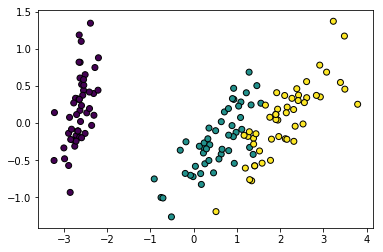

In [132]:
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
iris = datasets.load_iris()
Xorig = iris.data
y = iris.target
pca = PCA(n_components=2)
X = pca.fit(Xorig).transform(Xorig)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, edgecolor='k')
plt.show()

data = np.zeros((3,50,2))

data[0,:,:] = X[0:50,:] 
data[1,:,:] = X[50:100,:] 
data[2,:,:] = X[100:150,:] 



## Parameter Estimation
Given $\mathcal{X} = \{x^{t} , r^{t}\}$ where $r_{i}^{t}=1$  if  $x^{t} \in C_{i}$ if you assume $p(x|C_{i}) \sim \mathcal{N}(\mu_{i},\Sigma_{i})$. Then you can estimate $\mu_{i}$ and $\Sigma_{i}$

$\hat{\mu}_{i}$ = $m_{i}$ = $\frac{\sum_{t}r_{i}^{t}x^{t}}{\sum_{t}r_{i}^{t}}$

$\hat{\Sigma_{i}}$ = $S_{i}$ = $\frac{\sum_{t}r_{i}^{t}(x^{t} - m_{i})(x^{t} - m_{i})^{T}}{\sum_{t}r_{i}^{t}}$

In [133]:
#define a function for r_{i}^{t}
def r_i_t(i, t):    
    return 1 if y[t] == i else 0               

In [134]:
#Define a function to calculate parameters \mu and \sigma of a bivariate gaussian distribution of a class (c)
#with sample data (data)
#c: Number of class
#data: A vector with shape (nc, d ,2) where nc is the total of classes and d is the total of samples of each class.
def bivariate_gaussian_parameter_estimator(i = 0):
    count_i = 0
    count_m = 0
    count_s = 0
    for t in range(0,y.size):
        count_m += X[t] * r_i_t(i,t)        
        count_i += r_i_t(i,t)
    m_i = count_m/count_i
    for t in range(0,y.size):
        diff = X[t] - m_i
        diff = np.reshape(diff,(2,1))       
        count_s += np.dot(diff, diff.T) * r_i_t(i,t)
    s_i = count_s/count_i
    return m_i,s_i

In [135]:
m_1,s_1 = parameter_estimator(1)
print("m_1: " + str(m_1) + " s_1: " + str(s_1))
m_2,s_2 = parameter_estimator(2)
print("m_2: " + str(m_2) + " s_2: " + str(s_2))

m_1: [ 0.53199262 -0.24402963] s_1: [[0.34899363 0.19443157]
 [0.19443157 0.18078976]]
m_2: [2.10884814 0.05350968] s_2: [[0.48896484 0.26977165]
 [0.26977165 0.22766092]]


## Discrimant Functions

According to [Apl10] Eq. (5.22). If we assume a common covariance matrix with the form:

$S = \sum_{i}\hat{P}(C_{i})S_{i}$ With:

$\hat{P}(C_{i}) = \frac{\sum_{t}r_{i}^{t}}{N}$

Then the discriminant function for the class i is defined as:

$g_{i}(x) = -\frac{1}{2}(x - m_{i})^{T}S^{-1}(x-m_{i}) + log \hat{P}(C_{i})$


In [136]:
def prob_estimator(i = 0):
    count_i = 0.0
    for t in range(0, y.size):
        count_i += r_i_t(i,t)
    return count_i / y.size

In [137]:
S = prob_estimator(1)*s_1 + prob_estimator(2)*s_2

In [138]:
from numpy.linalg import inv
def discriminant(x, i = 0):
    m_i,s_i = parameter_estimator(i)
    p_i = prob_estimator(i)    
    return (-1.0/2.0)*np.dot(np.dot((x - m_i).transpose(),inv(S)),(x - m_i)) + np.log(p_i)

In [139]:
# d = np.ones(shape=(3,150))
# for t in range(0,y.size):
#     for i in range(0,3):
#         d[i][t] = discriminant(X[t],i)     
# print(d)

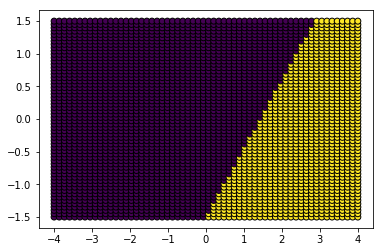

In [140]:
import numpy as np
import matplotlib.pyplot as plt
X_pred_x = np.linspace(-4.0, 4.0, 60)
X_pred_y = np.linspace(-1.5, 1.5, 60)
X_pred = [[xa, ya] for xa in X_pred_x for ya in X_pred_y]
X_pred = np.array(X_pred)
m,n = X_pred.shape
colors = np.zeros((m))
da = np.ones(shape=(2))
for ta in range(0,m):
    da[0] = discriminant(X_pred[ta],1)
    da[1] = discriminant(X_pred[ta],2)              
    colors[ta] = np.argmax(da)

plt.scatter(X_pred[:, 0], X_pred[:, 1], marker='o', c=colors, edgecolor='k')
plt.show()


